# Automating Crypto Website API Pull Using Python

In [43]:
#Pulling API from coinmarketcap.com

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b9a0f9a7-2be4-4f57-8696-30efff248069',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-10-26T20:36:26.062Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 9426}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9802, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [44]:
type(data)

dict

In [45]:
import pandas as pd

#To see all columns
#pd.set_option('display.max_columns', None)


In [46]:
#normalizing the data and putting it in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9802,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19190131.00000,19190131.00000,...,39.79070,435061184054.83002,None,2022-10-26T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 20:36:55.276662
1,1027,Ethereum,ETH,ethereum,6153,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,...,18.97440,189560454755.54001,None,2022-10-26T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 20:36:55.276662
2,825,Tether,USDT,tether,41281,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68513908026.83196,71141766321.77811,...,6.86050,71156106704.98000,None,2022-10-26T20:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-26 20:36:55.276662
3,1839,BNB,BNB,bnb,1130,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159979637.38233,159979963.59043,...,4.64170,57963764803.14000,None,2022-10-26T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 20:36:55.276662
4,3408,USD Coin,USDC,usd-coin,6596,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43924136680.07413,43924136680.07413,...,4.39630,43920563831.36000,None,2022-10-26T20:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-26 20:36:55.276662
5,52,XRP,XRP,xrp,828,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50085407159.00000,99989240406.00000,...,2.32920,46459212635.89000,None,2022-10-26T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 20:36:55.276662
6,4687,Binance USD,BUSD,binance-usd,5335,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,...,2.16590,21634636824.79000,None,2022-10-26T20:34:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-26 20:36:55.276662
7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34314873409.96200,35063885650.25700,...,1.38220,18104900778.41000,None,2022-10-26T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 20:36:55.276662
8,5426,Solana,SOL,solana,393,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,358516213.91358,511616946.14229,...,1.11640,15918116629.82000,None,2022-10-26T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 20:36:55.276662
9,74,Dogecoin,DOGE,dogecoin,578,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,...,0.95490,9538441857.34000,None,2022-10-26T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-26 20:36:55.276662


In [49]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b9a0f9a7-2be4-4f57-8696-30efff248069',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
     #creating a csv and appending data to it

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    if not os.path.isfile(r'C:\Users\ASUS\OneDrive\Desktop\Portfolio\Automating Crypto Website API Pull Using Python\API.csv'):
        df.to_csv(r'C:\Users\ASUS\OneDrive\Desktop\Portfolio\Automating Crypto Website API Pull Using Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\ASUS\OneDrive\Desktop\Portfolio\Automating Crypto Website API Pull Using Python\API.csv', mode='a', header=False)

In [50]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Completed successfully.')
    sleep(60) 
exit()    


{'status': {'timestamp': '2022-10-26T20:38:24.454Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9427}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9802, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


KeyboardInterrupt: 

In [ ]:
pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Portfolio\Automating Crypto Website API Pull Using Python\API.csv')

In [ ]:
#changing the format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

 ##   Looking at coin trends over time

In [ ]:
#percentage of coin change
df2= df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d']].mean()
df2

In [12]:
df3=df2.stack()
type(df3)

pandas.core.series.Series

In [16]:
df4 = df3.to_frame(name='values')
df4

values
name                                             
Bitcoin     quote.USD.percent_change_1h   0.15464
            quote.USD.percent_change_24h  2.50627
            quote.USD.percent_change_7d   8.06888
            quote.USD.percent_change_30d  7.87462
            quote.USD.percent_change_60d  3.73861
Ethereum    quote.USD.percent_change_1h   0.46171
            quote.USD.percent_change_24h  4.80312
            quote.USD.percent_change_7d  20.63136
            quote.USD.percent_change_30d 17.11542
            quote.USD.percent_change_60d  5.82585
Tether      quote.USD.percent_change_1h   0.00581
            quote.USD.percent_change_24h  0.00920
            quote.USD.percent_change_7d   0.01378
            quote.USD.percent_change_30d  0.02367
            quote.USD.percent_change_60d  0.01458
BNB         quote.USD.percent_change_1h   0.25718
            quote.USD.percent_change_24h  0.51786
            quote.USD.percent_change_7d   6.23099
            quote.USD.percent_change_30d  5.27637
            quote.USD.percent_change_60d  4.42560
USD Coin    quote.USD.percent_change_1h   0.01275
            quote.USD.percent_change_24h  0.01348
            quote.USD.percent_change_7d  -0.00383
            quote.USD.percent_change_30d -0.02520
            quote.USD.percent_change_60d -0.00453
XRP         quote.USD.percent_change_1h   0.19472
            quote.USD.percent_change_24h -0.13462
            quote.USD.percent_change_7d   1.22920
            quote.USD.percent_change_30d -2.29880
            quote.USD.percent_change_60d 38.66519
Binance USD quote.USD.percent_change_1h   0.10338
            quote.USD.percent_change_24h  0.03641
            quote.USD.percent_change_7d   0.02048
            quote.USD.percent_change_30d -0.00683
            quote.USD.percent_change_60d  0.00309
Cardano     quote.USD.percent_change_1h   0.41790
            quote.USD.percent_change_24h -2.03117
            quote.USD.percent_change_7d  12.81832
            quote.USD.percent_change_30d -9.88783
            quote.USD.percent_change_60d -9.12602
Solana      quote.USD.percent_change_1h   0.30424
            quote.USD.percent_change_24h -0.76184
            quote.USD.percent_change_7d   5.30873
            quote.USD.percent_change_30d -7.74146
            quote.USD.percent_change_60d -0.10456
Dogecoin    quote.USD.percent_change_1h   2.45103
            quote.USD.percent_change_24h 12.96875
            quote.USD.percent_change_7d  18.90113
            quote.USD.percent_change_30d 17.87552
            quote.USD.percent_change_60d 14.07742

In [25]:
#Index datafram for visualization 
df5=df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.15464
1,Bitcoin,quote.USD.percent_change_24h,2.50627
2,Bitcoin,quote.USD.percent_change_7d,8.06888
3,Bitcoin,quote.USD.percent_change_30d,7.87462
4,Bitcoin,quote.USD.percent_change_60d,3.73861
5,Ethereum,quote.USD.percent_change_1h,0.46171
6,Ethereum,quote.USD.percent_change_24h,4.80312
7,Ethereum,quote.USD.percent_change_7d,20.63136
8,Ethereum,quote.USD.percent_change_30d,17.11542
9,Ethereum,quote.USD.percent_change_60d,5.82585


In [29]:
df6 = df5.rename(columns={'level_1' : 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.15464
1,Bitcoin,quote.USD.percent_change_24h,2.50627
2,Bitcoin,quote.USD.percent_change_7d,8.06888
3,Bitcoin,quote.USD.percent_change_30d,7.87462
4,Bitcoin,quote.USD.percent_change_60d,3.73861
5,Ethereum,quote.USD.percent_change_1h,0.46171
6,Ethereum,quote.USD.percent_change_24h,4.80312
7,Ethereum,quote.USD.percent_change_7d,20.63136
8,Ethereum,quote.USD.percent_change_30d,17.11542
9,Ethereum,quote.USD.percent_change_60d,5.82585


In [32]:
df6['percent_change']=df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d'],['1h','24h','7d','30d','60d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.15464
1,Bitcoin,24h,2.50627
2,Bitcoin,7d,8.06888
3,Bitcoin,30d,7.87462
4,Bitcoin,60d,3.73861
5,Ethereum,1h,0.46171
6,Ethereum,24h,4.80312
7,Ethereum,7d,20.63136
8,Ethereum,30d,17.11542
9,Ethereum,60d,5.82585


## Visualizing Data

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

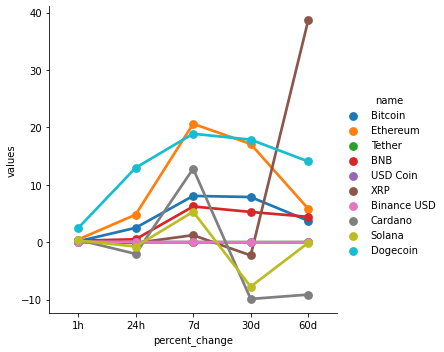

In [33]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point' )

In [38]:
df7=df[['name','quote.USD.price','timestamp']]
df7=df7.query("name=='Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,20753.59592,2022-10-26 19:57:29.261014
